# Lead Scoring Case Study Using Logistic Regression

# Import Necessary Libraries

In [1]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

# Importing the NumPy and Pandas 

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

# Reading and understanding the Dataset

In [2]:
# Read the dataset
leads = pd.read_csv("Leads.csv")

In [3]:
# Checking the head of dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Checking the Shape of dataset
leads.shape

(9240, 37)

In [5]:
# Checking the columns of the Dataset
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
# Descriptions about the columns
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Getting info about the columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Here we can see that there are few categorical variables present in the data and there are a lot of null values present in the data as well. So, we need to treat the null values and need to create dummy variables for the categorical variables as well.

## Exploratory Data Analysis

# Data Cleaning 

In [8]:
# Checking for missing values in each column
(leads.isnull().mean()*100).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [9]:
# Droping all the columns in which greater than 35% NA values are present
for c in leads.columns:
    if leads[c].isnull().mean()*100 > 35:
        leads.drop(c, axis=1,inplace=True)

In [10]:
# Again Checking for missing values in each column
(leads.isnull().mean()*100).sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

In [11]:
#checking value counts of "City" column
leads['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

##### Here we can see highest no. of leads from the city Mumbai and we can interpret that the variable 'city'won't be any use for our analysis. So we will drop it.

In [12]:
#checking value counts of "Country" column
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

##### The highest no. of leads is from india and the variable 'country' won't be any use for our analysis. So, we will drop the column 'Country'.

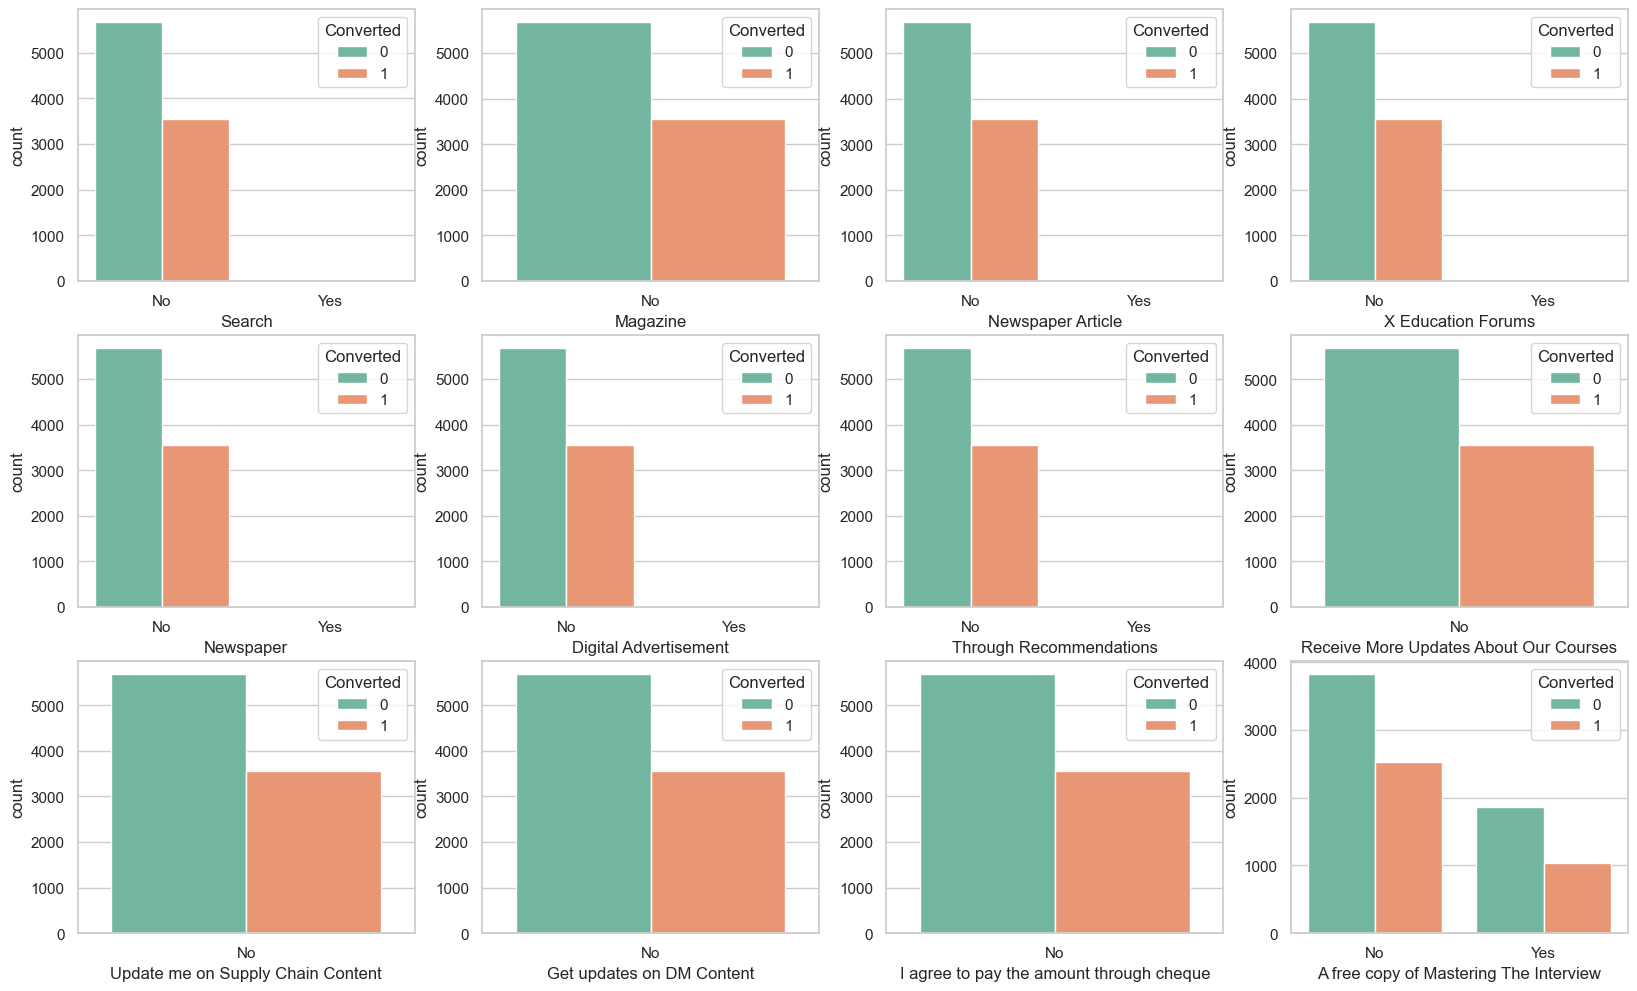

In [13]:
# Visualzing  variables for imbalancing
fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = leads, ax = axs[0,0],palette = 'Set2')
sns.countplot(x = "Magazine", hue = "Converted", data = leads, ax = axs[0,1],palette = 'Set2')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads, ax = axs[0,2],palette = 'Set2')
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads, ax = axs[0,3],palette = 'Set2')
sns.countplot(x = "Newspaper", hue = "Converted", data = leads, ax = axs[1,0],palette = 'Set2')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads, ax = axs[1,1],palette = 'Set2')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads, ax = axs[1,2],palette = 'Set2')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads, ax = axs[1,3],palette = 'Set2')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =leads, ax = axs[2,0],palette = 'Set2')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads, ax = axs[2,1],palette = 'Set2')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads, ax = axs[2,2],palette = 'Set2')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads, ax = axs[2,3],palette = 'Set2')
plt.show()

##### For all these columns except 'A free copy of Mastering The Interview' data is highly imbalanced and "A free copy of Mastering The Interview" is a redundant variable. So, we will drop all these columns.

In [14]:
#creating a list of columns to be dropped

cols_to_drop=(['City','Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

In [15]:
#checking value counts of Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

##### Google is having highest number of occurences, Hence we will impute the missing values with label 'Google'.

In [16]:
#replacing Na Value with Google
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')


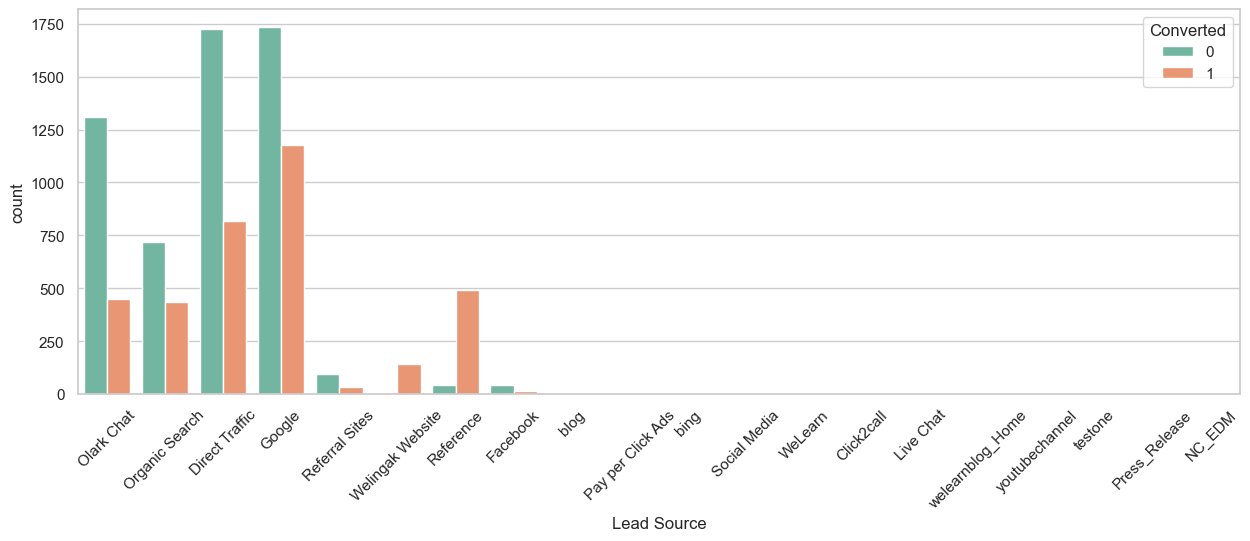

In [17]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =leads , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

##### Maximum Leads are generated by Google and Direct Traffic.Conversion rate of Reference leads and Welinkgak Website leads is very high.

In [18]:
#checking value counts of 'What is your current occupation' column
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

##### Now, there's the column 'What is your current occupation' which has a lot of null values. Now we can drop the entire column but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column What is you current occupation.

In [19]:
# Dropping the null values rows in the column 'What is your current occupation'

leads = leads[~pd.isnull(leads['What is your current occupation'])]

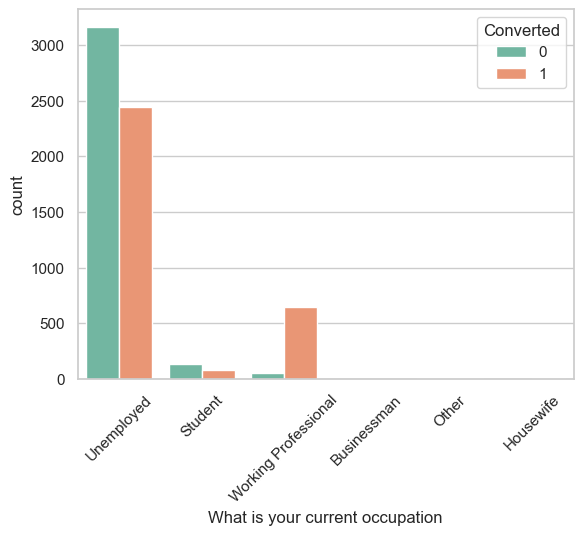

In [20]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = leads, palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()


##### Maximum leads generated are unemployed and their conversion rate is more than 50%.Conversion rate of working professionals is very high.

In [21]:
#checking value counts of 'What matters most to you in choosing a course'

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                            19
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

##### Here we can clearly seen that missing values in the this column can be imputed by 'Better Career Prospects' because the level 'Better Career Prospects' has occur highest no of times than other levels.

In [22]:
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

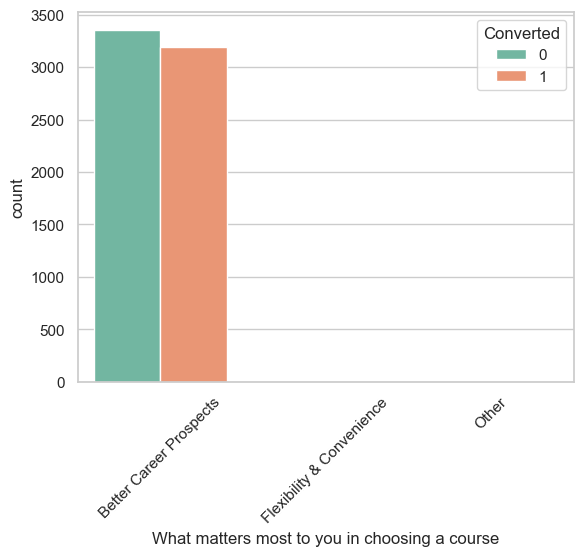

In [23]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = leads , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

##### This column spread of variance is very low , hence it can be dropped.

In [24]:
# Append 'What matters most to you in choosing a course'to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')

#checking updated list for columns to be dropped
cols_to_drop

['City',
 'Country',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'What matters most to you in choosing a course']

In [25]:
#checking value counts of Last Activity
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    2460
SMS Sent                        2213
Page Visited on Website          429
Olark Chat Conversation          428
Converted to Lead                296
Email Bounced                    197
Email Link Clicked               178
NaN                              103
Form Submitted on Website         82
Unreachable                       74
Unsubscribed                      43
Had a Phone Conversation          28
Approached upfront                 9
View in browser link Clicked       5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

##### Missing values can be imputed with mode value "Email Opened".

In [26]:
#replacing Nan Values with mode value "Email Opened"

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Email Opened')

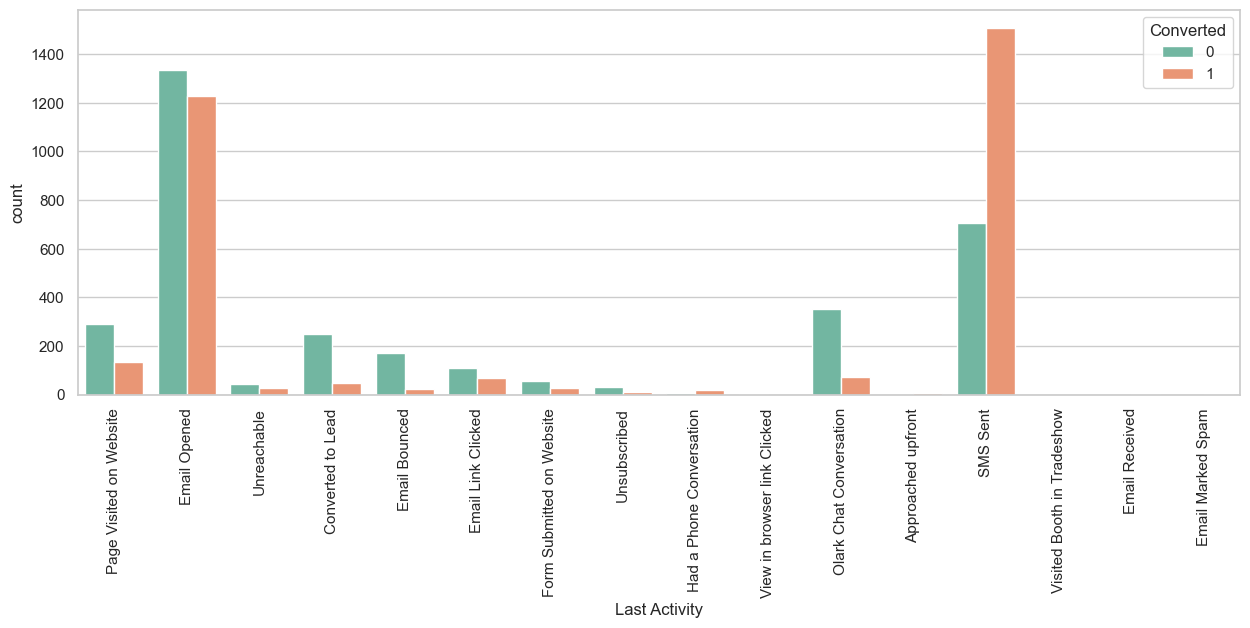

In [27]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = leads , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### Maximum leads are generated having last activity as Email opened but conversion rate is not too good.SMS sent as last acitivity has high conversion rate.

In [28]:
# Append 'Last Activity' to the cols_to_drop List it is a X-education's sales team generated data
cols_to_drop.append('Last Activity')

#checking updated list for columns to be dropped
cols_to_drop

['City',
 'Country',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'What matters most to you in choosing a course',
 'Last Activity']

In [29]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        2096
Email Opened                    2042
SMS Sent                        1889
Page Visited on Website          214
Email Link Clicked               110
Olark Chat Conversation           76
Email Bounced                     50
Unsubscribed                      33
Unreachable                       22
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

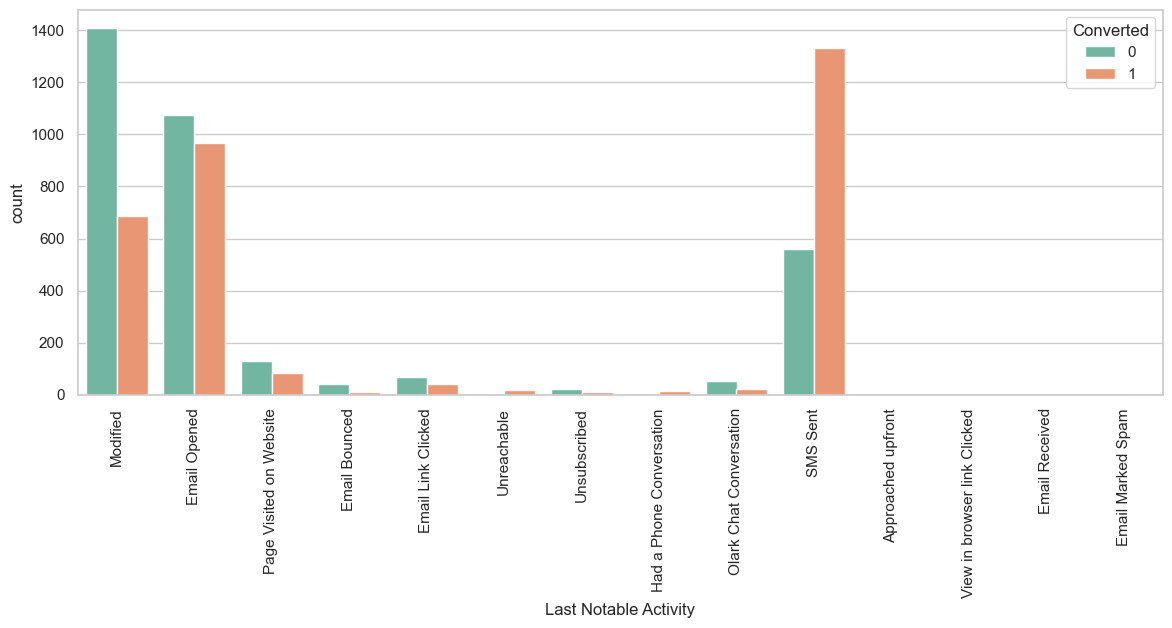

In [30]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads , palette = 'Set2')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

##### Maximum leads are generated having last activity as Email opened but conversion rate is not too good.SMS sent as last acitivity has high conversion rate.

In [31]:
# Append 'Last Notable Activity'to the cols_to_drop List as this is a sales team generated data
cols_to_drop.append('Last Notable Activity')
# checking final list of columns to be dropped
cols_to_drop

['City',
 'Country',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Last Notable Activity']

In [32]:
#dropping columns
leads = leads.drop(cols_to_drop,1)

In [33]:
# Checking for missing values in each column
(leads.isnull().mean()*100).sort_values(ascending=False)

TotalVisits                           1.984733
Page Views Per Visit                  1.984733
How did you hear about X Education    0.290076
Lead Profile                          0.290076
Specialization                        0.274809
Prospect ID                           0.000000
Lead Number                           0.000000
Lead Origin                           0.000000
Lead Source                           0.000000
Do Not Email                          0.000000
Do Not Call                           0.000000
Converted                             0.000000
Total Time Spent on Website           0.000000
What is your current occupation       0.000000
dtype: float64

In [34]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             604
Word Of Mouth             251
Student of SomeSchool     238
Other                     145
Multiple Sources          113
Social Media               53
Advertisements             50
Email                      22
SMS                        12
Name: How did you hear about X Education, dtype: int64

In [35]:
leads['Specialization'].value_counts()

Select                               1929
Finance Management                    762
Marketing Management                  678
Human Resource Management             676
Operations Management                 395
Business Administration               314
Supply Chain Management               278
IT Projects Management                278
Banking, Investment And Insurance     269
Media and Advertising                 162
Travel and Tourism                    150
International Business                138
Healthcare Management                 125
Hospitality Management                 93
E-COMMERCE                             81
Retail Management                      78
Rural and Agribusiness                 58
E-Business                             43
Services Excellence                    25
Name: Specialization, dtype: int64

In [36]:
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

##### As it can be seen that the levels of "Specialization","Lead Profile" and "How did you hear about X Education" have a lot of rows which have the value Select which is of no use to the analysis.So it's best that we drop them.

In [37]:
leads.drop(['Lead Profile', 'How did you hear about X Education','Specialization'], axis = 1, inplace = True)

In [38]:
# Checking for missing values in each column
(leads.isnull().mean()*100).sort_values(ascending=False)

TotalVisits                        1.984733
Page Views Per Visit               1.984733
Prospect ID                        0.000000
Lead Number                        0.000000
Lead Origin                        0.000000
Lead Source                        0.000000
Do Not Email                       0.000000
Do Not Call                        0.000000
Converted                          0.000000
Total Time Spent on Website        0.000000
What is your current occupation    0.000000
dtype: float64

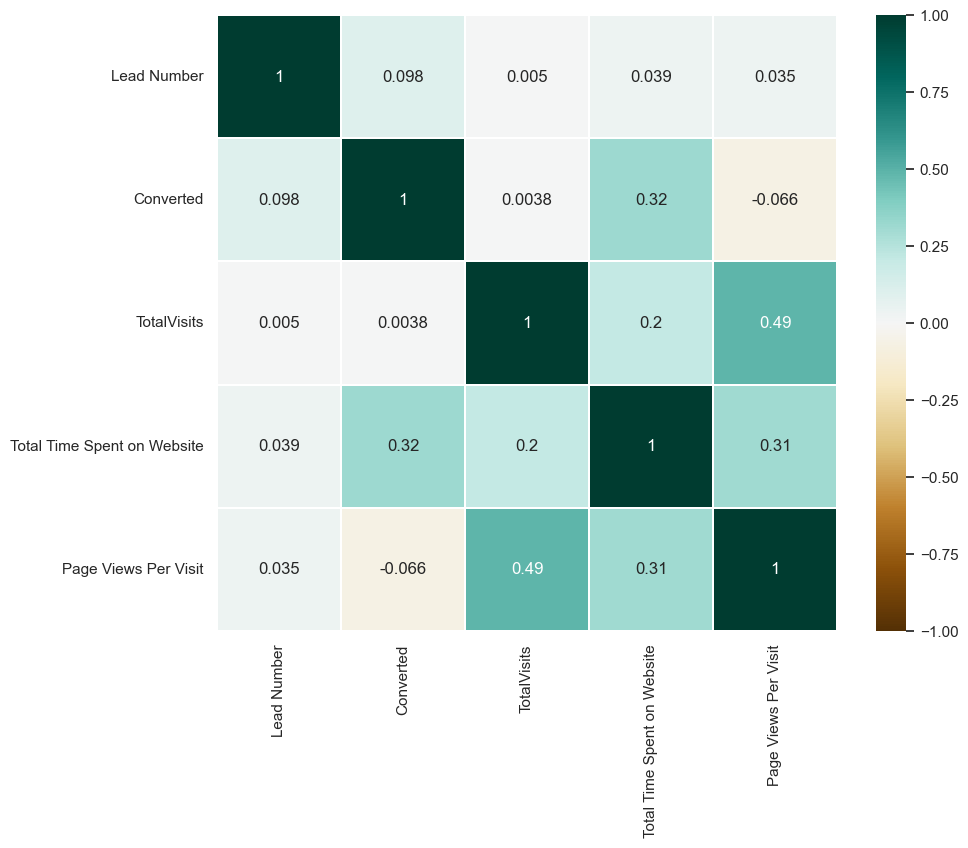

In [39]:
# Observing Correlation
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), annot=True,cmap="BrBG", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

In [40]:
# Again Checking for missing values in each column
(leads.isnull().mean()*100).sort_values(ascending=False)

TotalVisits                        1.984733
Page Views Per Visit               1.984733
Prospect ID                        0.000000
Lead Number                        0.000000
Lead Origin                        0.000000
Lead Source                        0.000000
Do Not Email                       0.000000
Do Not Call                        0.000000
Converted                          0.000000
Total Time Spent on Website        0.000000
What is your current occupation    0.000000
dtype: float64

##### Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [41]:
# Dropping the null values rows in the column 'TotalVisits','Page Views Per Visit','Last Activity'

leads = leads[~pd.isnull(leads['TotalVisits'])]
leads = leads[~pd.isnull(leads['Page Views Per Visit'])]

In [42]:
# Again Checking for missing values in each column
(leads.isnull().mean()*100).sort_values(ascending=False)

Prospect ID                        0.0
Lead Number                        0.0
Lead Origin                        0.0
Lead Source                        0.0
Do Not Email                       0.0
Do Not Call                        0.0
Converted                          0.0
TotalVisits                        0.0
Total Time Spent on Website        0.0
Page Views Per Visit               0.0
What is your current occupation    0.0
dtype: float64

In [43]:
#check for duplicates
sum(leads.duplicated(subset = 'Prospect ID')) == 0


True

In [44]:
#check for duplicates
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

In [45]:
#dropping Lead Number and Prospect ID since they have all unique values

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [46]:
print(len(leads.index))
print(len(leads.index)/9240)

6420
0.6948051948051948


##### We still have around 69% of the rows which seems good enough.

In [47]:
#checking info of dataset for remaining columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6420 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      6420 non-null   object 
 1   Lead Source                      6420 non-null   object 
 2   Do Not Email                     6420 non-null   object 
 3   Do Not Call                      6420 non-null   object 
 4   Converted                        6420 non-null   int64  
 5   TotalVisits                      6420 non-null   float64
 6   Total Time Spent on Website      6420 non-null   int64  
 7   Page Views Per Visit             6420 non-null   float64
 8   What is your current occupation  6420 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 501.6+ KB


In [48]:
#checking dataset
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,No,No,0,0.0,0,0.0,Unemployed
1,API,Organic Search,No,No,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Unemployed


# Analysing Categorical features

### Outlier Analysis

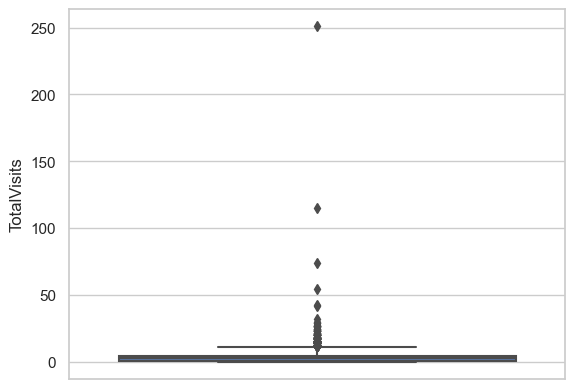

In [49]:
#visualizing spread of variable Total Visits

sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [50]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6420.000000
mean        3.604050
std         5.037196
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.100000
95%        10.000000
99%        17.810000
max       251.000000
Name: TotalVisits, dtype: float64

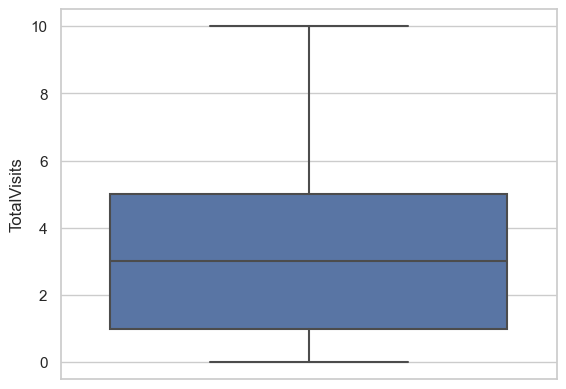

In [51]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'])
plt.show()

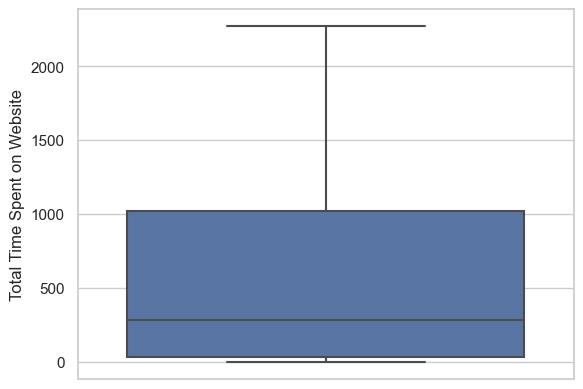

In [52]:
#visualizing spread of variable 'Total Time Spent on Website'

sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

##### Since there are no major outliers for the above variable, outlier treatment is not required for it.

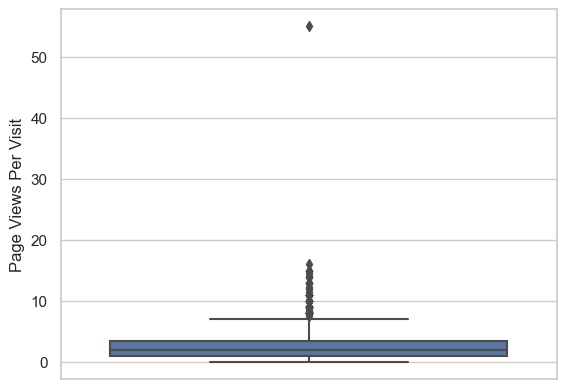

In [53]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =leads['Page Views Per Visit'])
plt.show()

In [54]:
#checking percentile values for "Total Visits"

leads['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6420.000000
mean        2.466978
std         2.166570
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.500000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

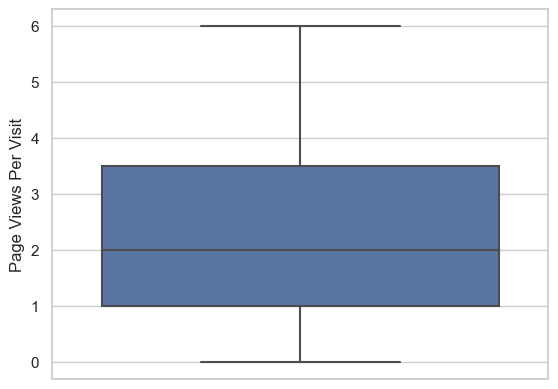

In [55]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

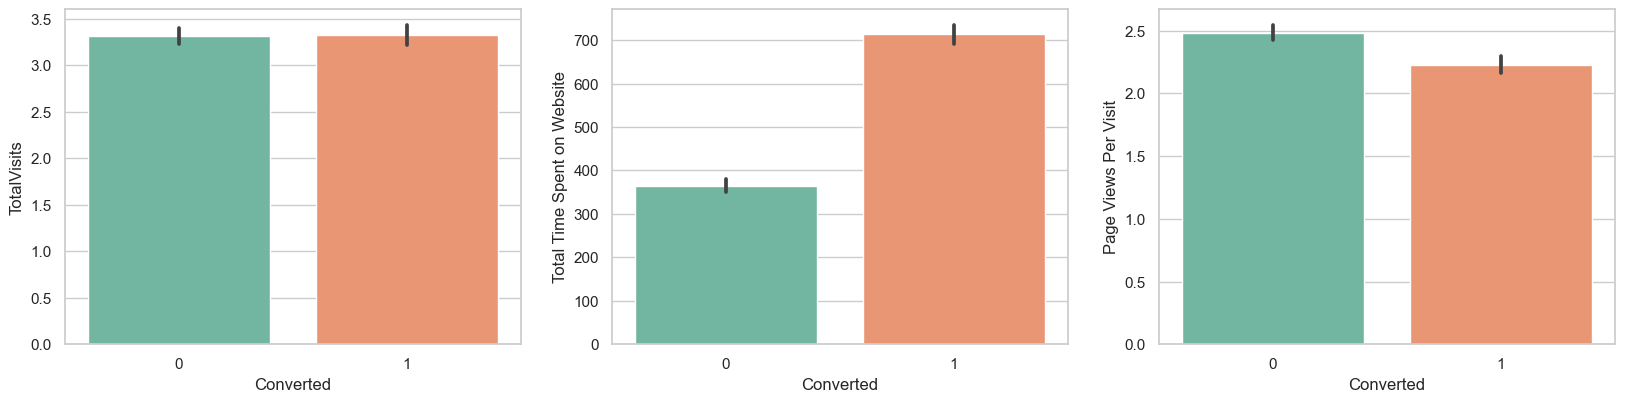

In [56]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leads)
plt.show()

##### The conversion rate is high for Total Visits, Total Time Spent on Website and Page Views Per Visit.Now, all data labels are in good shape , we will proceed to our next step which is Data Preparation.

# Data Preparation

 ### Converting some binary variables (Yes/No) to 0/1

In [57]:
# List of variables to map

varlist =  ['Do Not Email','Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [58]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Unemployed


In [59]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6420 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      6420 non-null   object 
 1   Lead Source                      6420 non-null   object 
 2   Do Not Email                     6420 non-null   int64  
 3   Do Not Call                      6420 non-null   int64  
 4   Converted                        6420 non-null   int64  
 5   TotalVisits                      6420 non-null   float64
 6   Total Time Spent on Website      6420 non-null   int64  
 7   Page Views Per Visit             6420 non-null   float64
 8   What is your current occupation  6420 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 501.6+ KB


### Dummy variable creation

#### The next step is to dealing with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [60]:
# Checking the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [61]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'What is your current occupation']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [62]:
# Dropping the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'What is your current occupation'], 1)

In [63]:
# Let's take a look at the dataset again

leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Test-Train Split

In [64]:
# Put all the feature variables in X

X = leads.drop(['Converted'], 1)
#checking head of X
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [65]:
# Putting response variable to y
y = leads['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [66]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [67]:
#lets check the shape of Train & Test Data
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)
print("X_test Size", X_test.shape)
print("y_test Size", y_test.shape)


X_train Size (4494, 28)
y_train Size (4494,)
X_test Size (1926, 28)
y_test Size (1926,)


### Feature Scaling

In [68]:
# Scaling the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
6630,0,0,0.2,0.084332,0.333333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8176,0,0,0.2,0.154461,0.166667,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4978,0,0,0.4,0.498447,0.666667,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7457,0,0,0.5,0.085664,0.833333,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4383,0,0,0.6,0.234798,1.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [69]:
# Looking at the correlations

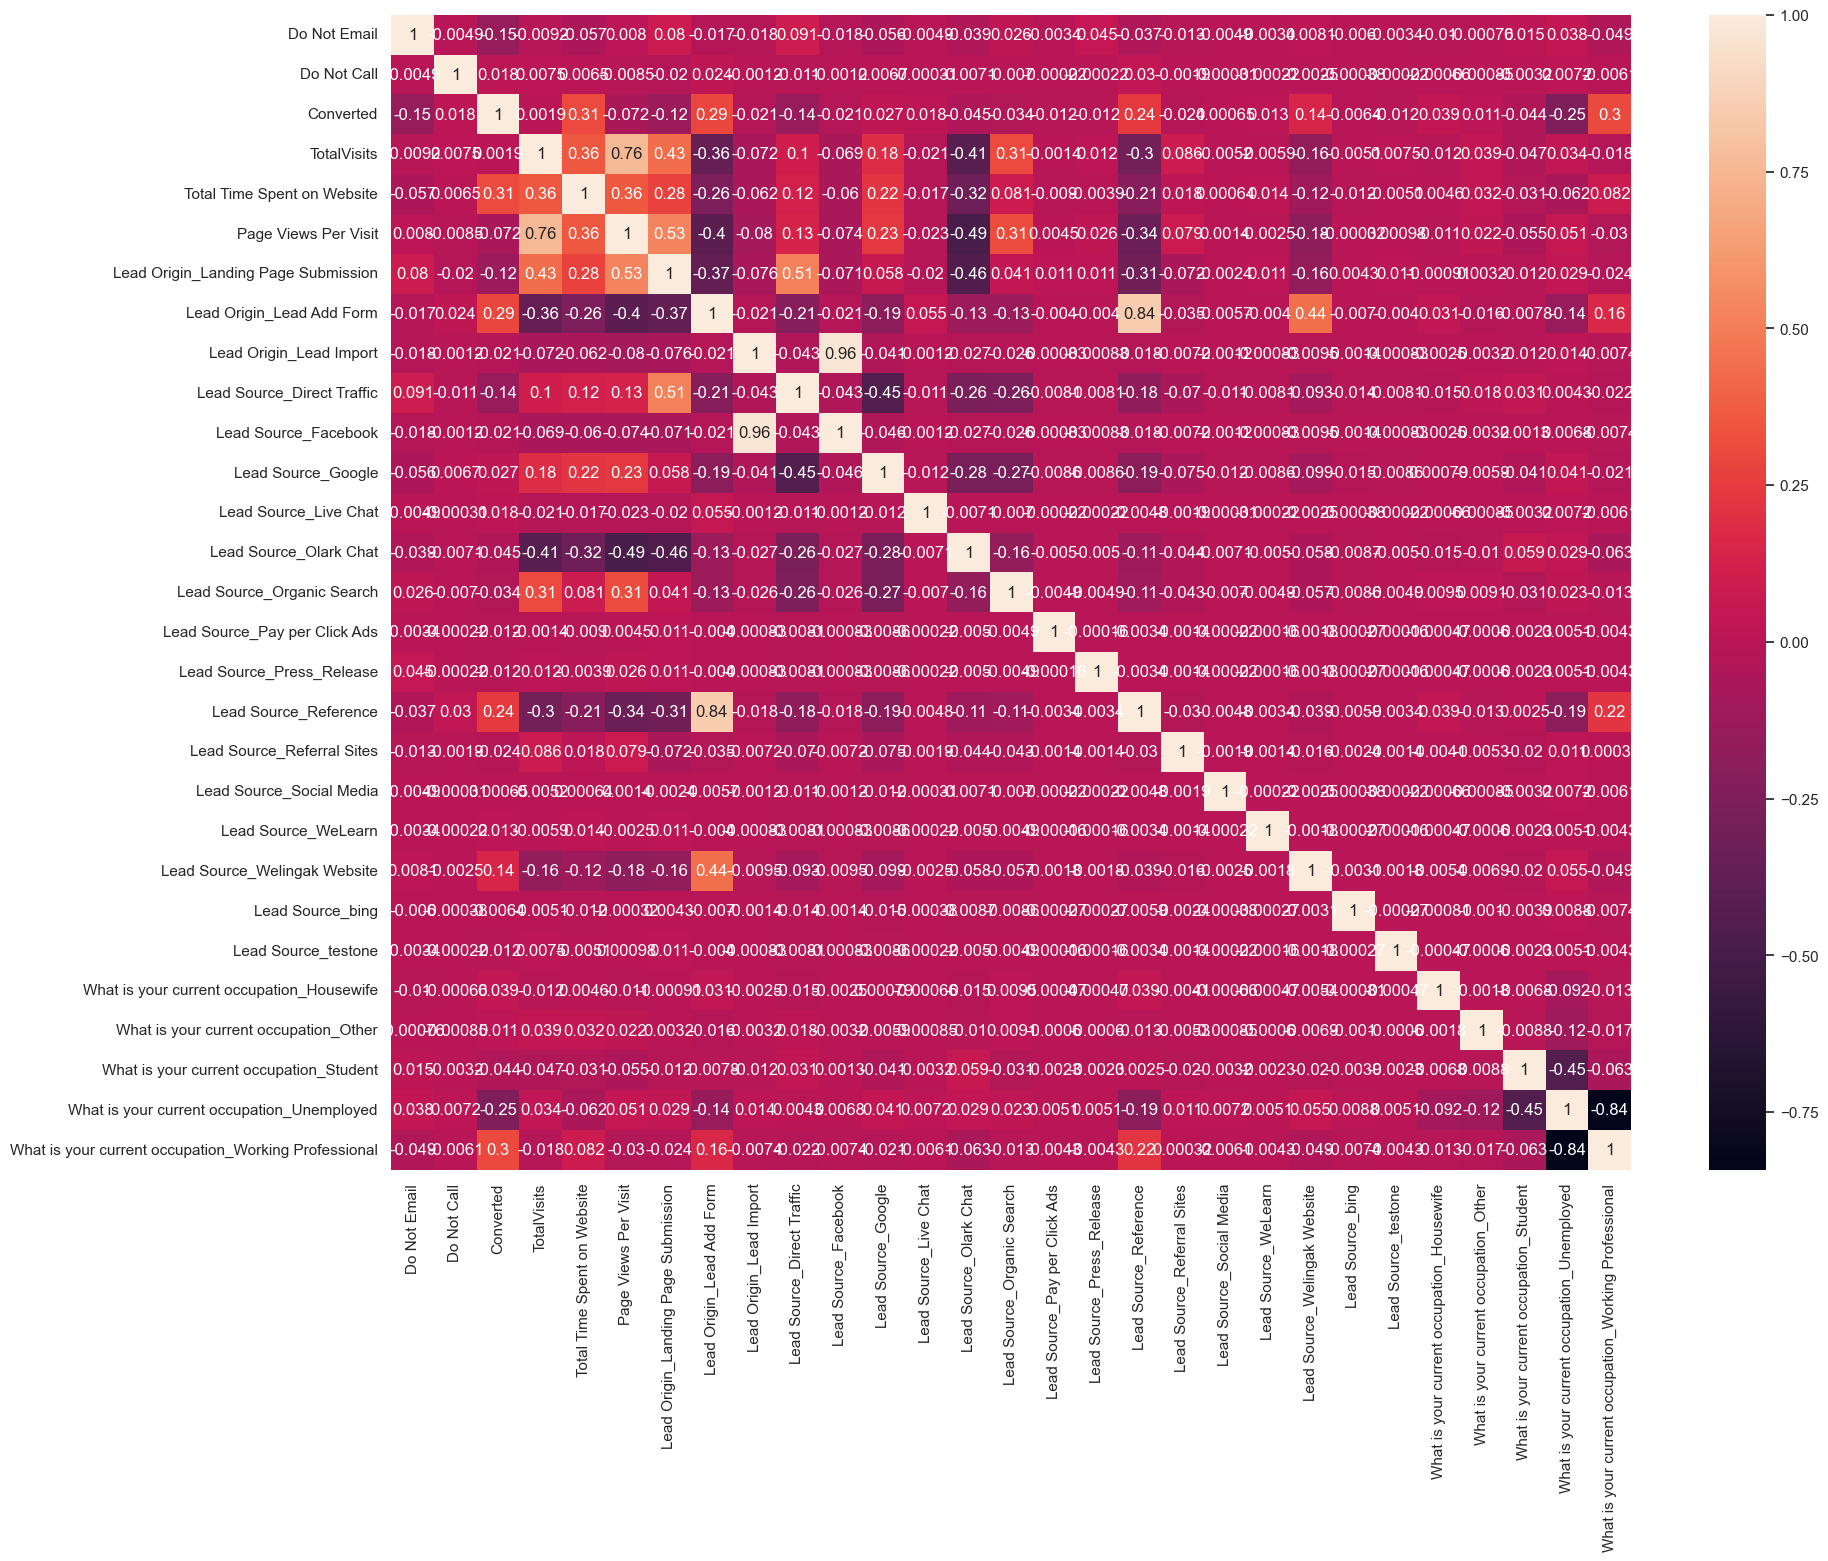

In [70]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(leads.corr(),annot = True)
plt.show()


## Dropping highly correlated dummy variables

In [71]:
X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)


# Model Building

##### Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

## Feature Selection Using RFE (Recursive Feature Elimination)

In [72]:
# Importing the 'LogisticRegression' and creating a LogisticRegression object
logreg = LogisticRegression()

In [73]:
# Importing the 'RFE' and select 15 variables

rfe=RFE(logreg,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [74]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 11),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 8),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 12),
 ('Lead Source_Press_Release', False, 6),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 7),
 ('Lead Source_WeLearn', False, 10),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 4),
 ('Lead Source_testone', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 5),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Une

In [75]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Lead Source_testone',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [76]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Lead Origin_Lead Import', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'What is your current occupation_Other'],
      dtype='object')

##### Now we have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [77]:
# Select only the columns selected by RFE

X_train = X_train[col]

# Model 1

In [78]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4478
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2207.8
Date:                Sun, 19 Nov 2023   Deviance:                       4415.6
Time:                        16:52:11   Pearson chi2:                 4.64e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3310
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1092      0.598      0.183      0.855      -1.062       1.281
Do Not Email                                            -1.3809      0.183     -7.558      0.000      -1.739      -1.023
TotalVisits                                              1.1264      0.203      5.535      0.000       0.728       1.525
Total Time Spent on Website                              4.4180      0.178     24.761      0.000       4.068       4.768
Page Views Per Visit                                    -0.4911      0.208     -2.359      0.018      -0.899      -0.083
Lead Origin_Lead Add Form                                3.0538      0.252     12.141      0.000       2.561       3.547
Lead Source_Direct Traffic                              -1.6321      0.142    -11.513      0.000      -1.910      -1.354
Lead Source_Google                                      -1.1787      0.139     -8.461      0.000      -1.452      -0.906
Lead Source_Organic Search                              -1.4288      0.173     -8.255      0.000      -1.768      -1.090
Lead Source_Referral Sites                              -1.7938      0.364     -4.924      0.000      -2.508      -1.080
Lead Source_Welingak Website                             2.1218      1.037      2.047      0.041       0.090       4.153
Lead Source_testone                                    -22.9924   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
What is your current occupation_Housewife               20.7300   1.98e+04      0.001      0.999   -3.88e+04    3.89e+04
What is your current occupation_Student                 -0.8374      0.626     -1.337      0.181      -2.065       0.390
What is your current occupation_Unemployed              -0.6376      0.594     -1.074      0.283      -1.801       0.526
What is your current occupation_Working Professional     1.8431      0.619      2.976      0.003       0.629       3.057
========================================================================================================================
"""

In [79]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,8.07
13,What is your current occupation_Unemployed,6.04
1,TotalVisits,5.95
6,Lead Source_Google,4.88
5,Lead Source_Direct Traffic,4.26
7,Lead Source_Organic Search,3.13
2,Total Time Spent on Website,2.41
4,Lead Origin_Lead Add Form,1.91
14,What is your current occupation_Working Professional,1.75
9,Lead Source_Welingak Website,1.32


##### p-value of variable What is your current occupation_Housewife is high, so we can drop it.

In [80]:
#dropping column with high p-value
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)


# Model 2

In [81]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4479
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2208.5
Date:                Sun, 19 Nov 2023   Deviance:                       4417.0
Time:                        16:52:14   Pearson chi2:                 4.64e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3308
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3192      0.570      0.560      0.575      -0.797       1.436
Do Not Email                                            -1.3811      0.183     -7.557      0.000      -1.739      -1.023
TotalVisits                                              1.1244      0.203      5.526      0.000       0.726       1.523
Total Time Spent on Website                              4.4196      0.178     24.770      0.000       4.070       4.769
Page Views Per Visit                                    -0.4906      0.208     -2.357      0.018      -0.899      -0.083
Lead Origin_Lead Add Form                                3.0574      0.251     12.160      0.000       2.565       3.550
Lead Source_Direct Traffic                              -1.6325      0.142    -11.515      0.000      -1.910      -1.355
Lead Source_Google                                      -1.1768      0.139     -8.447      0.000      -1.450      -0.904
Lead Source_Organic Search                              -1.4284      0.173     -8.253      0.000      -1.768      -1.089
Lead Source_Referral Sites                              -1.7929      0.364     -4.921      0.000      -2.507      -1.079
Lead Source_Welingak Website                             2.1188      1.037      2.044      0.041       0.087       4.151
Lead Source_testone                                    -20.9912   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
What is your current occupation_Student                 -1.0479      0.599     -1.748      0.080      -2.223       0.127
What is your current occupation_Unemployed              -0.8482      0.565     -1.500      0.134      -1.956       0.260
What is your current occupation_Working Professional     1.6326      0.592      2.757      0.006       0.472       2.793
========================================================================================================================
"""

In [82]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,8.07
12,What is your current occupation_Unemployed,6.00
1,TotalVisits,5.95
6,Lead Source_Google,4.87
5,Lead Source_Direct Traffic,4.25
7,Lead Source_Organic Search,3.13
2,Total Time Spent on Website,2.41
4,Lead Origin_Lead Add Form,1.89
13,What is your current occupation_Working Professional,1.74
9,Lead Source_Welingak Website,1.32


##### p-value of variable Lead Source_testone is high, so we can drop it.

In [83]:
#dropping column with high p-value
X_train.drop('Lead Source_testone', axis = 1, inplace = True)

# Model 3

In [84]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4480
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2209.4
Date:                Sun, 19 Nov 2023   Deviance:                       4418.9
Time:                        16:52:18   Pearson chi2:                 4.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3305
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3165      0.570      0.555      0.579      -0.800       1.433
Do Not Email                                            -1.3805      0.183     -7.555      0.000      -1.739      -1.022
TotalVisits                                              1.1185      0.203      5.500      0.000       0.720       1.517
Total Time Spent on Website                              4.4178      0.178     24.766      0.000       4.068       4.767
Page Views Per Visit                                    -0.4937      0.208     -2.372      0.018      -0.902      -0.086
Lead Origin_Lead Add Form                                3.0596      0.251     12.172      0.000       2.567       3.552
Lead Source_Direct Traffic                              -1.6243      0.142    -11.473      0.000      -1.902      -1.347
Lead Source_Google                                      -1.1684      0.139     -8.399      0.000      -1.441      -0.896
Lead Source_Organic Search                              -1.4188      0.173     -8.208      0.000      -1.758      -1.080
Lead Source_Referral Sites                              -1.7834      0.364     -4.897      0.000      -2.497      -1.070
Lead Source_Welingak Website                             2.1205      1.037      2.046      0.041       0.089       4.152
What is your current occupation_Student                 -1.0478      0.599     -1.748      0.080      -2.223       0.127
What is your current occupation_Unemployed              -0.8494      0.565     -1.502      0.133      -1.958       0.259
What is your current occupation_Working Professional     1.6317      0.592      2.756      0.006       0.471       2.792
========================================================================================================================
"""

##### p-value of variable What is your current occupation_Unemployed is high, so we can drop it.

In [85]:
#dropping column with high p-value
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

# Model 4

In [86]:
# Refit the model with the new set of features

logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4481
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2210.7
Date:                Sun, 19 Nov 2023   Deviance:                       4421.3
Time:                        16:52:21   Pearson chi2:                 4.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3302
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5296      0.086     -6.141      0.000      -0.699      -0.361
Do Not Email                                            -1.3858      0.183     -7.583      0.000      -1.744      -1.028
TotalVisits                                              1.1228      0.203      5.519      0.000       0.724       1.521
Total Time Spent on Website                              4.4273      0.178     24.830      0.000       4.078       4.777
Page Views Per Visit                                    -0.4958      0.208     -2.383      0.017      -0.904      -0.088
Lead Origin_Lead Add Form                                3.0653      0.251     12.198      0.000       2.573       3.558
Lead Source_Direct Traffic                              -1.6259      0.142    -11.486      0.000      -1.903      -1.348
Lead Source_Google                                      -1.1723      0.139     -8.430      0.000      -1.445      -0.900
Lead Source_Organic Search                              -1.4176      0.173     -8.204      0.000      -1.756      -1.079
Lead Source_Referral Sites                              -1.7906      0.364     -4.916      0.000      -2.505      -1.077
Lead Source_Welingak Website                             2.1128      1.037      2.038      0.042       0.081       4.144
What is your current occupation_Student                 -0.2031      0.207     -0.981      0.326      -0.609       0.203
What is your current occupation_Working Professional     2.4772      0.184     13.493      0.000       2.117       2.837
========================================================================================================================
"""

##### p-value of variable What is your current occupation_Student	 is high, so we can drop it.

In [87]:
#dropping column with high p-value
X_train.drop('What is your current occupation_Student', axis = 1, inplace = True)

# Model 5

In [88]:
# Refit the model with the new set of features

logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4482
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2211.2
Date:                Sun, 19 Nov 2023   Deviance:                       4422.3
Time:                        16:52:24   Pearson chi2:                 4.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3300
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5409      0.085     -6.328      0.000      -0.708      -0.373
Do Not Email                                            -1.3842      0.183     -7.582      0.000      -1.742      -1.026
TotalVisits                                              1.1235      0.203      5.522      0.000       0.725       1.522
Total Time Spent on Website                              4.4246      0.178     24.825      0.000       4.075       4.774
Page Views Per Visit                                    -0.4932      0.208     -2.369      0.018      -0.901      -0.085
Lead Origin_Lead Add Form                                3.0663      0.251     12.199      0.000       2.574       3.559
Lead Source_Direct Traffic                              -1.6236      0.141    -11.478      0.000      -1.901      -1.346
Lead Source_Google                                      -1.1671      0.139     -8.403      0.000      -1.439      -0.895
Lead Source_Organic Search                              -1.4127      0.173     -8.179      0.000      -1.751      -1.074
Lead Source_Referral Sites                              -1.7807      0.364     -4.891      0.000      -2.494      -1.067
Lead Source_Welingak Website                             2.1205      1.037      2.046      0.041       0.089       4.152
What is your current occupation_Working Professional     2.4841      0.183     13.541      0.000       2.125       2.844
========================================================================================================================
"""

In [89]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,8.05
1,TotalVisits,5.92
6,Lead Source_Google,3.27
5,Lead Source_Direct Traffic,2.78
7,Lead Source_Organic Search,2.49
2,Total Time Spent on Website,2.40
4,Lead Origin_Lead Add Form,1.40
9,Lead Source_Welingak Website,1.32
10,What is your current occupation_Working Professional,1.18
8,Lead Source_Referral Sites,1.11


##### The variable Page Views Per Visit has high VIF. So, we should drop it.

In [90]:
#dropping column with high VIF value
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

# Model 6

In [91]:
# Refit the model with the new set of features

logm6 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res=logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4483
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2214.0
Date:                Sun, 19 Nov 2023   Deviance:                       4427.9
Time:                        16:52:29   Pearson chi2:                 4.66e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3292
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5489      0.085     -6.421      0.000      -0.716      -0.381
Do Not Email                                            -1.3754      0.182     -7.545      0.000      -1.733      -1.018
TotalVisits                                              0.8498      0.167      5.082      0.000       0.522       1.178
Total Time Spent on Website                              4.4170      0.178     24.820      0.000       4.068       4.766
Lead Origin_Lead Add Form                                3.0960      0.252     12.292      0.000       2.602       3.590
Lead Source_Direct Traffic                              -1.7356      0.134    -12.972      0.000      -1.998      -1.473
Lead Source_Google                                      -1.2881      0.130     -9.941      0.000      -1.542      -1.034
Lead Source_Organic Search                              -1.5628      0.161     -9.709      0.000      -1.878      -1.247
Lead Source_Referral Sites                              -1.9111      0.361     -5.296      0.000      -2.618      -1.204
Lead Source_Welingak Website                             2.0956      1.037      2.021      0.043       0.064       4.128
What is your current occupation_Working Professional     2.4766      0.183     13.518      0.000       2.117       2.836
========================================================================================================================
"""

In [92]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,3.96
5,Lead Source_Google,2.55
2,Total Time Spent on Website,2.40
4,Lead Source_Direct Traffic,2.21
6,Lead Source_Organic Search,2.01
3,Lead Origin_Lead Add Form,1.40
8,Lead Source_Welingak Website,1.32
9,What is your current occupation_Working Professional,1.18
0,Do Not Email,1.09
7,Lead Source_Referral Sites,1.08


##### Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

# Model Evaluation

In [93]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))

# Creating a dataframe with the actual conversion flag and the predicted probabilities

In [94]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
6630,0,0.149049
8176,0,0.221055
4978,0,0.669204
7457,0,0.212744
4383,0,0.428007


# Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [95]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
6630,0,0.149049,0
8176,0,0.221055,0
4978,0,0.669204,1
7457,0,0.212744,0
4383,0,0.428007,0


# Creating the Confusion matrix

In [96]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1973  368]
 [ 654 1499]]


In [97]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7725856697819314


In [98]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
# Calculating the 'sensitivity'

TP/(TP+FN)

0.6962378077101719

In [100]:
# Calculating the 'specificity'

TN/(TN+FP)

0.8428022212729602

# Finding the Optimal Cutoff

In [101]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [102]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

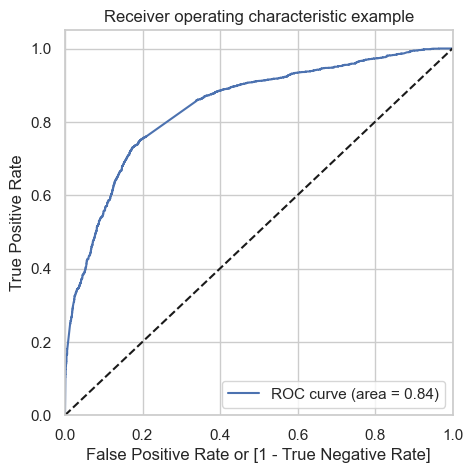

In [103]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [104]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6630,0,0.149049,0,1,1,0,0,0,0,0,0,0,0
8176,0,0.221055,0,1,1,1,0,0,0,0,0,0,0
4978,0,0.669204,1,1,1,1,1,1,1,1,0,0,0
7457,0,0.212744,0,1,1,1,0,0,0,0,0,0,0
4383,0,0.428007,0,1,1,1,1,1,0,0,0,0,0


In [105]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.479083  1.000000  0.000000
0.1   0.1  0.515799  0.997213  0.073046
0.2   0.2  0.631731  0.942406  0.346006
0.3   0.3  0.736093  0.885741  0.598462
0.4   0.4  0.779039  0.749187  0.806493
0.5   0.5  0.772586  0.696238  0.842802
0.6   0.6  0.753672  0.621458  0.875267
0.7   0.7  0.724299  0.514631  0.917129
0.8   0.8  0.679795  0.380864  0.954720
0.9   0.9  0.642190  0.272643  0.982059


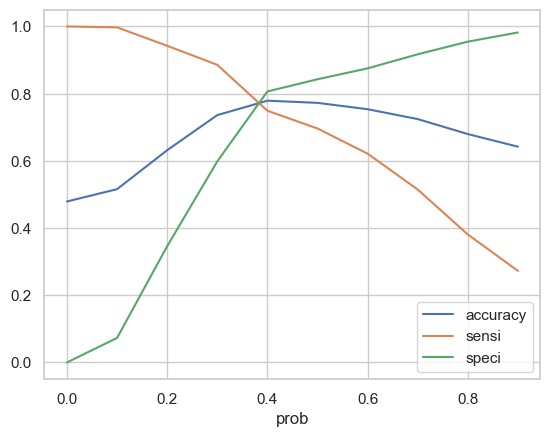

In [106]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [107]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.39 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
6630,0,0.149049,0,1,1,0,0,0,0,0,0,0,0,0
8176,0,0.221055,0,1,1,1,0,0,0,0,0,0,0,0
4978,0,0.669204,1,1,1,1,1,1,1,1,0,0,0,1
7457,0,0.212744,0,1,1,1,0,0,0,0,0,0,0,0
4383,0,0.428007,0,1,1,1,1,1,0,0,0,0,0,1


In [108]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7783711615487316

In [109]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1879,  462],
       [ 534, 1619]], dtype=int64)

In [110]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [111]:
# Calculating the 'Sensitivity'

TP/(TP+FN)

0.7519739897816999

In [112]:
# Calculating the 'Specificity'

TN/(TN+FP)

0.8026484408372491

##### So as we can see above the model seems to be performing well. The ROC curve has a value of 0.84, which is very good. We have the following values for the Train Data:

Accuracy : 77.83%
Sensitivity :75.19%
Specificity : 80.26%

## Precision & Recall

In [113]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[1879,  462],
       [ 534, 1619]], dtype=int64)

In [114]:
# Precision
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7779913503123498

In [115]:
# Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7519739897816999

## Precision and Recall Trade-off

In [116]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

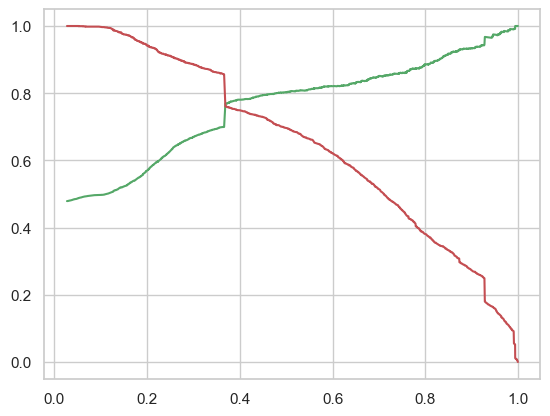

In [117]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making Predictions on the Test Set

In [118]:
# Scaling the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [119]:
# Selecting the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_testone,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4051,0,0.4,0.676431,0.333333,0,0,1,0,0,0,0,0,0,1,0
1696,1,0.3,0.356414,0.500000,0,1,0,0,0,0,0,0,0,1,0
1325,0,0.9,0.536174,1.000000,0,0,0,1,0,0,0,0,0,1,0
7991,0,0.3,0.764314,0.250000,0,0,1,0,0,0,0,0,0,1,0
8177,0,0.3,0.456724,0.500000,0,0,1,0,0,0,0,0,0,1,0


In [120]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [121]:
# Checking X_test_sm

X_test_sm

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_testone,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4051,1.0,0,0.4,0.676431,0.333333,0,0,1,0,0,0,0,0,0,1,0
1696,1.0,1,0.3,0.356414,0.500000,0,1,0,0,0,0,0,0,0,1,0
1325,1.0,0,0.9,0.536174,1.000000,0,0,0,1,0,0,0,0,0,1,0
7991,1.0,0,0.3,0.764314,0.250000,0,0,1,0,0,0,0,0,0,1,0
8177,1.0,0,0.3,0.456724,0.500000,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8757,1.0,0,0.5,0.194851,0.278333,0,1,0,0,0,0,0,0,0,0,1
2398,1.0,0,0.5,0.003107,0.416667,0,0,1,0,0,0,0,0,0,1,0
6668,1.0,0,0.3,0.150022,0.500000,0,0,1,0,0,0,0,0,0,1,0
1405,1.0,0,0.3,0.187750,0.500000,0,0,1,0,0,0,0,0,0,1,0


In [122]:
# Dropping the required columns from X_test as well

X_test.drop(['What is your current occupation_Housewife','Lead Source_testone','What is your current occupation_Unemployed','What is your current occupation_Student','Page Views Per Visit'], 1, 
                                inplace = True)

In [123]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [124]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [125]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [126]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [127]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [128]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [129]:
# Make predictions on the test set using 0.39 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.39 else 0)

In [130]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.816191,1
1,1,0.138150,0
2,0,0.735239,1
3,0,0.857411,1
4,1,0.607144,1


In [131]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7736240913811008

In [132]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[768, 220],
       [216, 722]], dtype=int64)

In [133]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [134]:
# Calculating the 'sensitivity'
TP / float(TP+FN)

0.7697228144989339

In [135]:
# Calculating the 'specificity'
TN / float(TN+FP)

0.7773279352226721

After running the model on the Test Data these are the figures we obtain:

Accuracy : 77.36%
Sensitivity :76.97%
Specificity : 77.73%

## Conclusion:

1. While we have checked both Sensitivity-Specificity, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
2. Accuracy, Sensitivity and Specificity values of test set are around 77.36%, 76.97% and 77.73% which are approximately closer to the respective values calculated using trained set.
3. Hence overall this model seems to be good.

#### Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :

1. Lead Origin_Lead Add Form
2. What is your current occupation_Working Professional
3. Total Time Spent on Website

# Recommendation:

To improve our lead conversion rates, here are some recommendations:

1. Utilize features with positive coefficients in targeted marketing strategies to effectively attract potential leads.
2. Focus efforts on acquiring high-quality leads from the most successful lead sources identified.
3. Optimize communication channels by assessing their impact on lead engagement for more effective outreach.
4. Consider allocating a higher budget for advertising and related activities on the WelingakWebsite.
5. Adopt an aggressive approach in targeting working professionals, capitalizing on their high conversion rates and potentially stronger financial capabilities that allow for higher fees.

